Imports


In [28]:
pip install ucimlrepo


In [29]:
!pip install keras-tuner
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo
import keras_tuner as kt

In [30]:
from ucimlrepo import

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [31]:
# Fetch dataset
rice = fetch_ucirepo(id=545)
X = rice.data.features
y = rice.data.targets

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_cnn = X_train.to_numpy().reshape(-1, X_train.shape[1], 1, 1)
X_test_cnn = X_test.to_numpy().reshape(-1, X_test.shape[1], 1, 1)
# Train-test split

In [32]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (3048, 7)
Test data shape: (762, 7)


In [34]:
# Convert input data into a shape suitable for CNN
X_train_cnn = X_train.reshape(-1, X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(-1, X_test.shape[1], 1, 1)


# Define CNN model
def build_cnn(input_shape):
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        keras.layers.BatchNormalization(),
        # Add padding='same' to the MaxPooling2D layers
        keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        keras.layers.Dropout(0.3),

        keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        keras.layers.BatchNormalization(),
        # Add padding='same' to the MaxPooling2D layers
        keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
        keras.layers.Dropout(0.3),

        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and train the CNN model
model = build_cnn((X_train.shape[1], 1, 1))
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=100, batch_size=16, callbacks=[early_stopping], verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8664 - loss: 0.3496 - val_accuracy: 0.9003 - val_loss: 0.4511
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8991 - loss: 0.2870 - val_accuracy: 0.9134 - val_loss: 0.2524
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9144 - loss: 0.2608 - val_accuracy: 0.9173 - val_loss: 0.2107
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9182 - loss: 0.2182 - val_accuracy: 0.9108 - val_loss: 0.2107
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9097 - loss: 0.2442 - val_accuracy: 0.9121 - val_loss: 0.2092
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9245 - loss: 0.2147 - val_accuracy: 0.9160 - val_loss: 0.2059
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9176 - loss: 0.2220 - val_accuracy: 0.9160 - val_loss: 0.2070
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9154 - loss: 0.2168 - v

In [35]:
# Evaluate the model using the reshaped test data (X_test_cnn)
test_loss, test_acc = model.evaluate(X_test_cnn, y_test) # Use X_test_cnn instead of X_test
print("Test accuracy:", test_acc)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9267 - loss: 0.1793
Test accuracy: 0.9199475049972534


In [36]:
def build_hypermodel(hp):
    model = keras.Sequential()

    # First Conv2D Layer
    model.add(keras.layers.Conv2D(
        filters=hp.Int('filters_1', min_value=16, max_value=64, step=16),
        kernel_size=(hp.Choice('kernel_1', values=[3, 5]), 1), # Changed kernel_size to reduce only first dimension and to 1 in the second dimension
        activation='relu',
        padding='same',
        input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2], 1)
    ))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', 0.2, 0.5, step=0.1)))

    # Second Conv2D Layer
    model.add(keras.layers.Conv2D(
        filters=hp.Int('filters_2', min_value=32, max_value=128, step=32),
        kernel_size=(hp.Choice('kernel_2', values=[3, 5]), 1), # Changed kernel_size to reduce only first dimension and to 1 in the second dimension
        activation='relu',
        padding='same'
    ))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(keras.layers.Dropout(hp.Float('dropout_2', 0.2, 0.5, step=0.1)))

    # Fully Connected Layers
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(
        hp.Int('dense_units', min_value=32, max_value=128, step=32),
        activation='relu'
    ))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(hp.Float('dropout_3', 0.2, 0.5, step=0.1)))

    # Output Layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-3, 1e-4])
        ),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model
# Define hyperparameter tuner
tuner = kt.BayesianOptimization(
    build_hypermodel,
    objective='val_accuracy',
    max_trials= 3,  # Number of different model versions to try
    executions_per_trial=3,  #Change executions_per_trial to 3
    directory='tuner_results',
    project_name='rice_cnn_tuning'
)

# Run hyperparameter search
tuner.search(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=20, batch_size=16, callbacks=[early_stopping])

# Evaluate on test set
best_model = tuner.get_best_models(num_models=1)[0]
test_loss, test_accuracy = best_model.evaluate(X_test_cnn, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Generate Classification Report
from sklearn.metrics import classification_report

y_pred = (best_model.predict(X_test_cnn) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

Reloading Tuner from tuner_results/rice_cnn_tuning/tuner0.json


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9309 - loss: 0.1806
Test Accuracy: 0.9226
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       326
           1       0.92      0.95      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



In [37]:
from sklearn.metrics import classification_report

# Get predictions (convert probabilities to binary labels)
y_pred = (model.predict(X_test_cnn) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       326
           1       0.93      0.93      0.93       436

    accuracy                           0.92       762
   macro avg       0.92      0.92      0.92       762
weighted avg       0.92      0.92      0.92       762



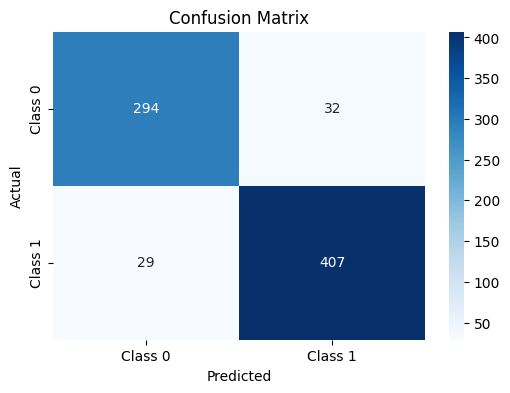

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

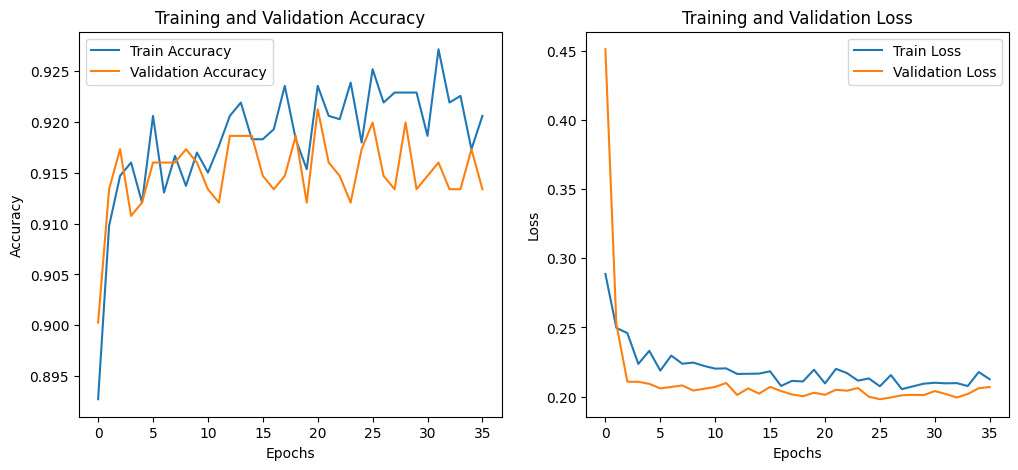

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()